In [54]:
#K. David Roell CFPB 8/30/2016
#Ingests CSVs of macro edits 
#Writes CSV of macro edits by agency code
#Visualizes edits by number and year
#

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import pandas as pd
get_ipython().magic(u'matplotlib inline') #used for in notebook plotting
matplotlib.style.use('ggplot')


In [55]:
year = 2014 #start year
macro_dfs = {}
path = 'macro_csvs/'
while year > 1991:
    try:
        load_df = pd.read_csv(path + 'macro_'+str(year)+'.csv') #load macro edits csv file from disk
        load_df['year'] = year #set year column
    except OSError as e:
        print("data not loaded for {year}".format(year=year), e)
        break
    macro_dfs[year] = load_df #load df into dictionary with year as key
    year -=1 #decrement call year

data not loaded for 2004 File b'macro_csvs/macro_2004.csv' does not exist


In [56]:
#load all annual CSVs to dictionary
#create new df copy for summary table
path = 'macro_by_agency/'

for key in macro_dfs.keys():
    summary_df = macro_dfs[key].copy() #copy df to create summary table

    #get counts of macro edits by agency code
    by_agency_df = summary_df.copy() #instantiate agency_df
    by_agency_df.drop(['year', 'arid'], axis=1, inplace=True) #remove non groupable fields
    by_agency_df = by_agency_df.groupby('agency').count() #count instances of failures, sum will not work

    #add total index and sum each edit count
    sum_df = by_agency_df.copy()
    sum_df = sum_df.sum() #put sums of edits in new frame
    sum_df.name=('total') #name the frame (required to append)
    by_agency_df = by_agency_df.append(sum_df)#add sum as bottom row
    by_agency_df['year'] = key #set year column
    if not os.path.exists(path):
        os.makedirs(path) #create path if none
    try:
        print('writing macro_by_agency_{year}'.format(year=key))
        by_agency_df.to_csv(path + 'macro_by_agency_'+str(key)+'.csv') #write to file
    except:
        print('not written for {year}'.format(year=key))

writing macro_by_agency_2005
writing macro_by_agency_2006
writing macro_by_agency_2007
writing macro_by_agency_2008
writing macro_by_agency_2009
writing macro_by_agency_2010
writing macro_by_agency_2011
writing macro_by_agency_2012
writing macro_by_agency_2013
writing macro_by_agency_2014


In [57]:
first = True
for key in macro_dfs.keys():

    if first:
        first = False
        base = pd.DataFrame(macro_dfs[key].copy())
        base.drop(['agency', 'arid'], axis=1, inplace=True)
        base.set_index('year', drop=True, inplace=True)
        base = pd.DataFrame(base.sum())

        base = base.T
        base['year'] = key
        #print(base.head(), 'base_top', type(base))
    else:
        new = pd.DataFrame(macro_dfs[key].copy())
        new.drop(['agency', 'arid'], axis=1, inplace=True)
        new.set_index('year', drop=True, inplace=True)
        new = pd.DataFrame(new.sum())
        new = new.T
        new['year'] = key
        #print(new.head())
        base = pd.concat([base, new], axis=0)
#print(base.head())

print('writing macro counts by year')
base.to_csv('macro_counts_by_year.csv', index=False)

writing macro counts by year


/Users/roellk/homebrew/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


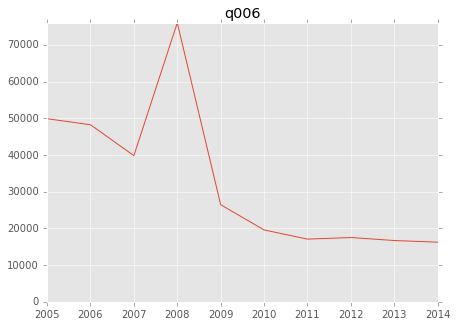

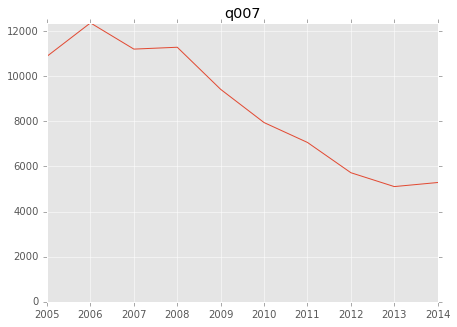

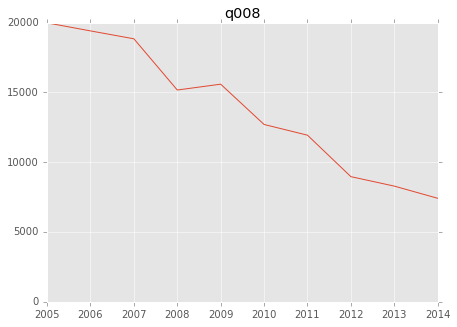

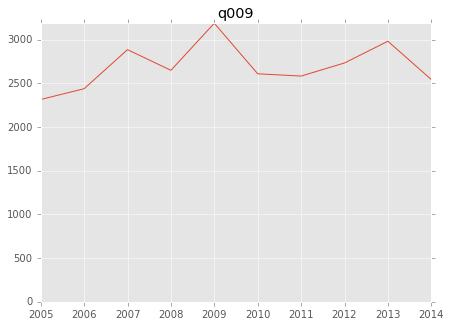

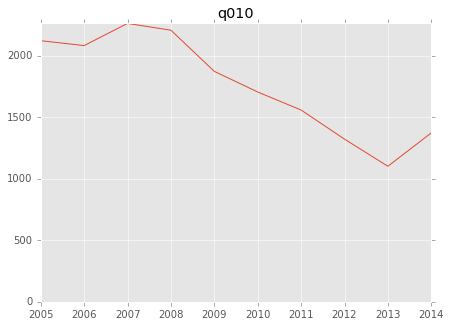

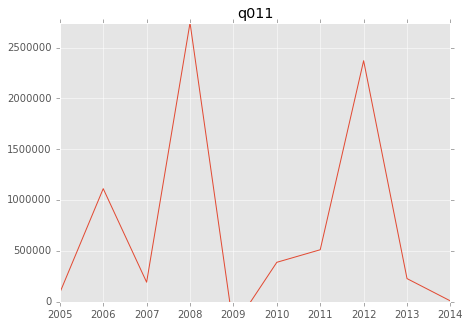

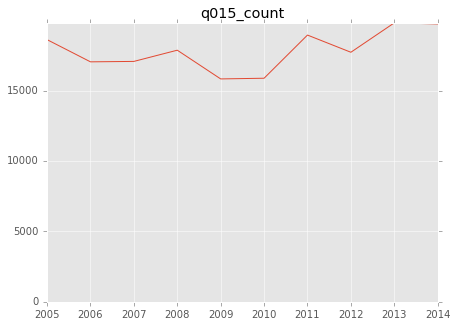

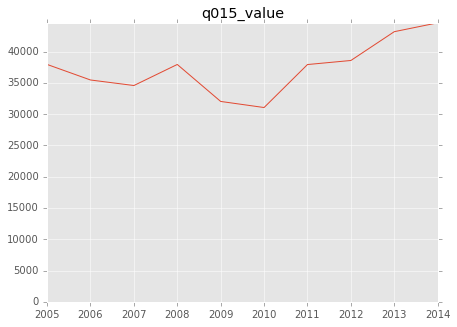

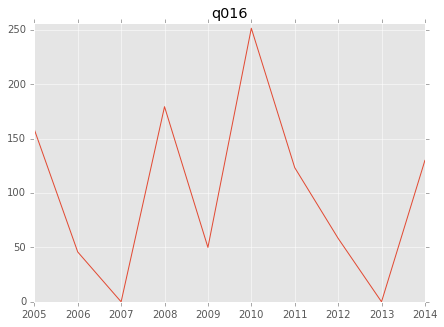

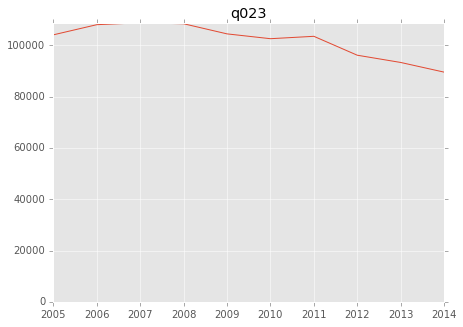

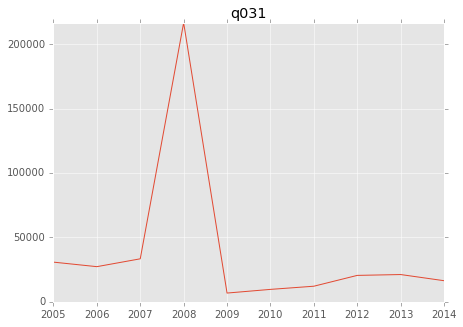

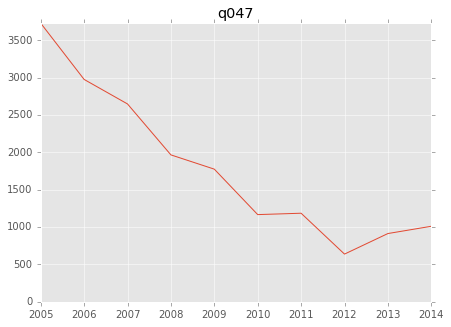

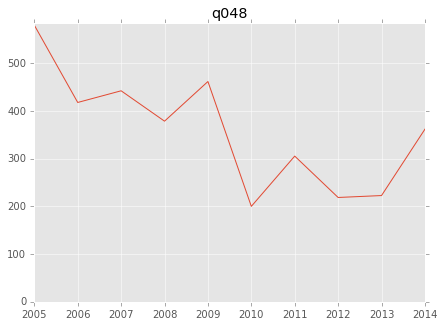

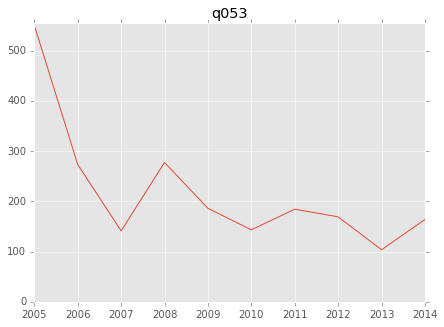

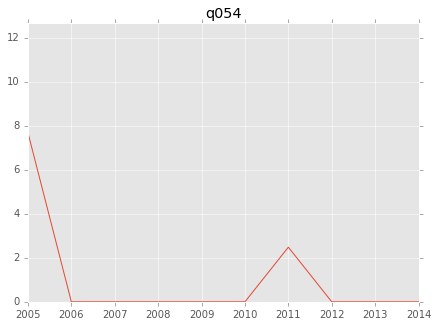

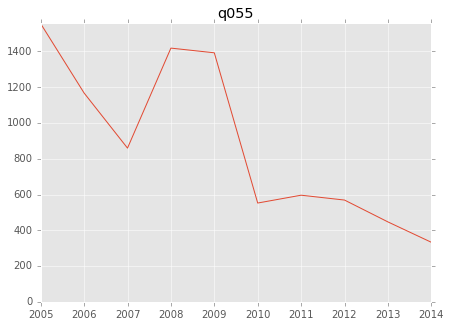

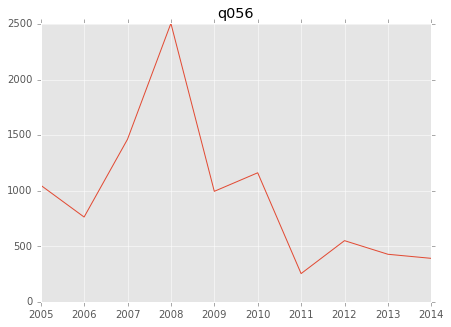

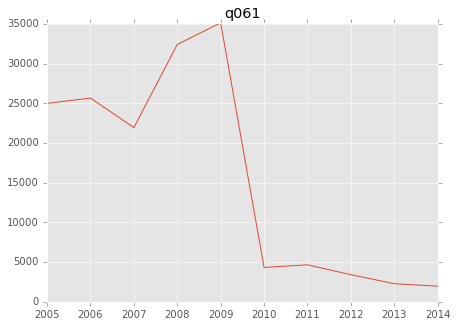

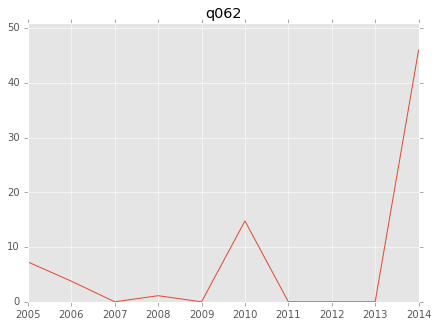

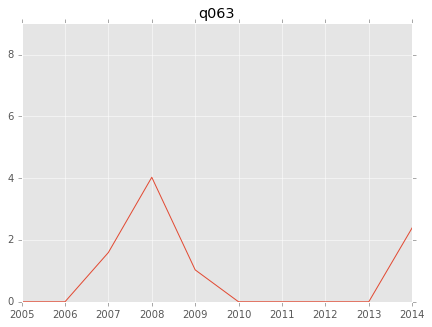

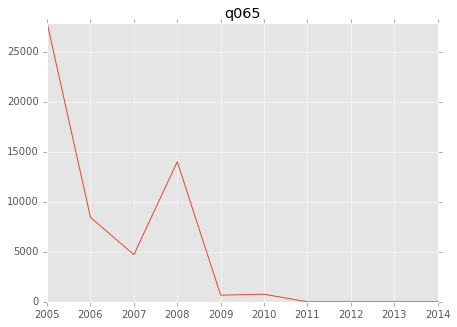

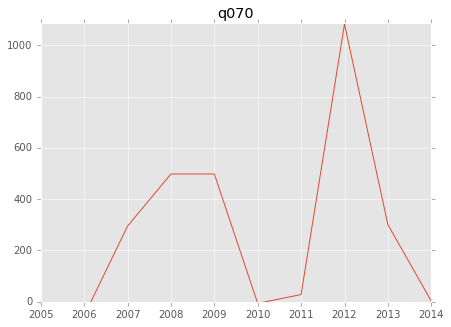

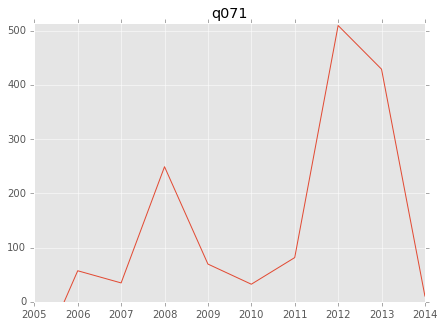

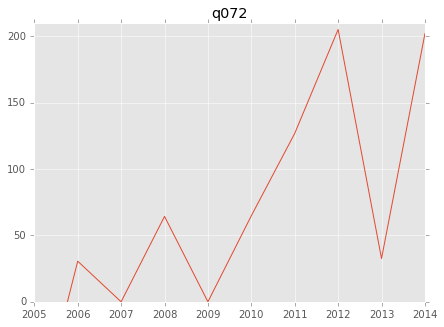

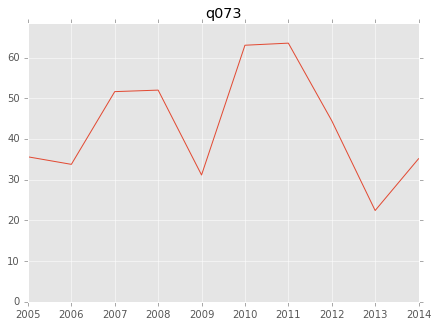

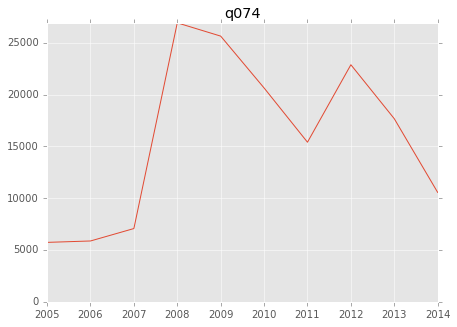

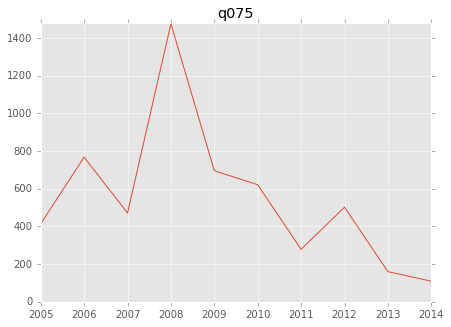

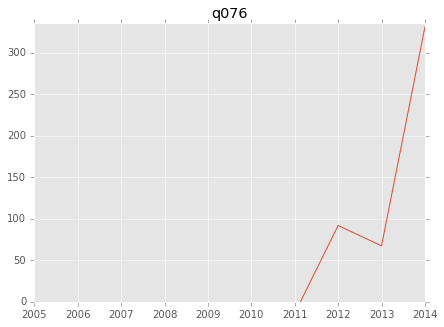

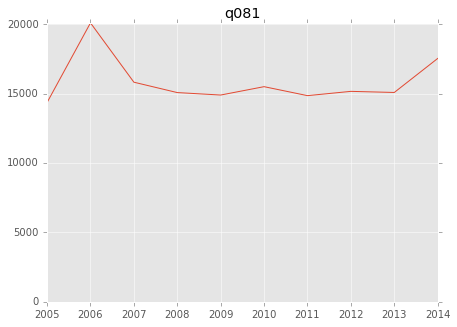

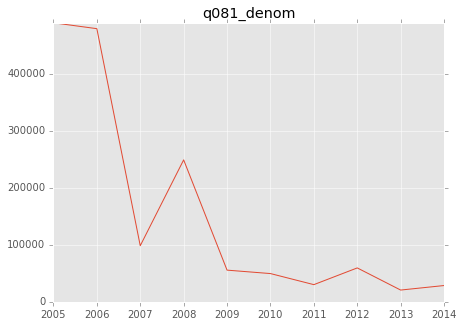

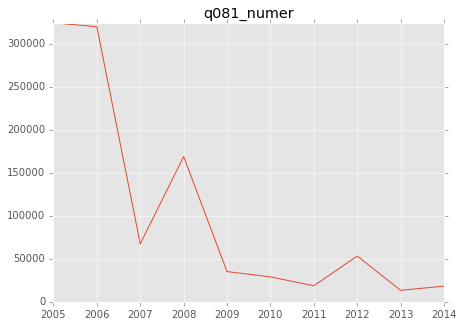

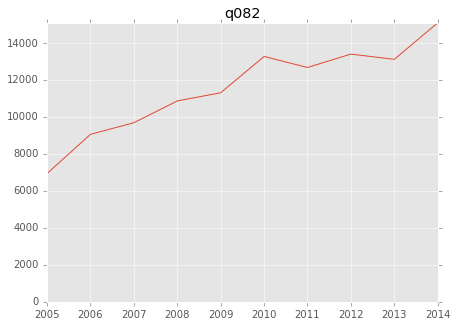

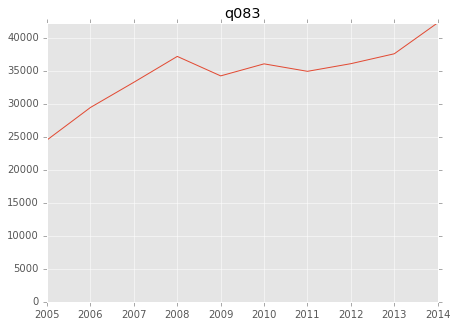

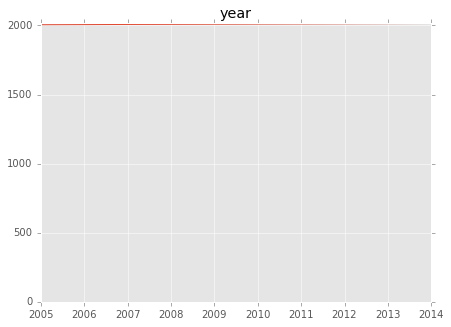

In [58]:
#FIXME remove year graph (where year is x and y)
path = 'macro_graphs/'
graph_df = base.copy()
graph_df.fillna(0, inplace=True)
for col in graph_df.columns:
    y = graph_df[col]
    x = list(range(len(graph_df[col])))
    #print(y)
    #print(x)
    #print(base.index)
    x_ticks = [tick for tick in base.year]#list(base.index)
    #x_ticks = np.asarray(x_ticks)
    #print(x_ticks)
    #convert xticks to ndarray
    
    plt.figure(figsize=(7,5))
    plt.xticks(x, x_ticks)
    plt.ylim(0,max(y)+5)
    #print(max(y))
    plt.title(col)
    plt.plot(x, y)
    
    if not os.path.exists(path):
        os.makedirs(path)
    plt.savefig(path + col)